# RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song)

The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) contains 7,356 files (total size: 24.8 GB). The database contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech includes calm, happy, sad, angry, fearful, surprise, and disgust expressions, and song contains calm, happy, sad, angry, and fearful emotions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression. All conditions are available in three modality formats: Audio-only (16bit, 48kHz .wav), Audio-Video (720p H.264, AAC 48kHz, .mp4), and Video-only (no sound). Note, there are no song files for Actor_18.

# Importing all modules

In [1]:
#!pip install librosa
#if already installed comment the previous command
import librosa
import librosa.display

In [2]:
import os
from glob import glob
import numpy as np
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

# Audio data navigation

In [3]:
os.getcwd()

'C:\\Users\\aleza\\Desktop\\TesiAZ'

In [4]:
path = os.getcwd()
file_name = "Audio_Speech_Actors_01-24"
new_path = os.path.join(path, file_name)
os.chdir(new_path)

In [5]:
os.listdir()

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [6]:
path = os.getcwd()
file_name = "Actor_01"
new_path2 = os.path.join(path, file_name) 

In [7]:
os.listdir(new_path2)[0]

'03-01-01-01-01-01-01.wav'

In [8]:
new_path3 = os.path.join(new_path2, os.listdir(new_path2)[0])

In [9]:
print(new_path, '\n' + new_path2, '\n' + new_path3)

C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Actors_01-24 
C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Actors_01-24\Actor_01 
C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Actors_01-24\Actor_01\03-01-01-01-01-01-01.wav


### We want to convert the sound to numpy array

In [10]:
y, sr = librosa.load(new_path3)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 143)

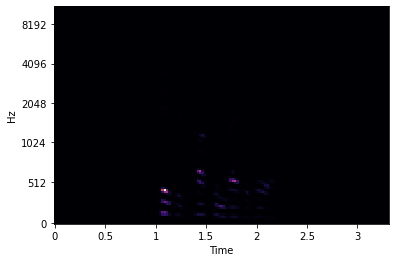

In [11]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

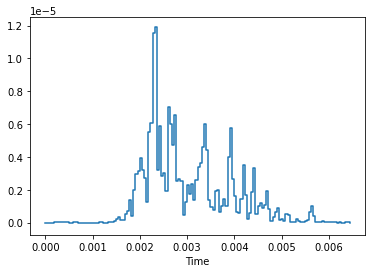

In [12]:
librosa.display.waveshow(ps, sr=sr)

Using the os Libraries to walk in all the folders and files in a directory path, in this case ('Desktop/tesi/Audio_Speech_Actors_01-24') after this it's just printing the data…
Basically it shows that data and files available to be used in the notebook

In [13]:
def file_list(directory):
    dirs = os.listdir(directory)
    for dir in dirs:
        print(dir)
        path = os.path.join(directory, dir)
        files = os.listdir(path)
        print(files)       

In [14]:
file_list(os.getcwd())

Actor_01
['03-01-01-01-01-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-02-01-01.wav', '03-01-01-01-02-02-01.wav', '03-01-02-01-01-01-01.wav', '03-01-02-01-01-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-02-01-02-02-01.wav', '03-01-02-02-01-01-01.wav', '03-01-02-02-01-02-01.wav', '03-01-02-02-02-01-01.wav', '03-01-02-02-02-02-01.wav', '03-01-03-01-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-03-01-02-02-01.wav', '03-01-03-02-01-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-03-02-02-01-01.wav', '03-01-03-02-02-02-01.wav', '03-01-04-01-01-01-01.wav', '03-01-04-01-01-02-01.wav', '03-01-04-01-02-01-01.wav', '03-01-04-01-02-02-01.wav', '03-01-04-02-01-01-01.wav', '03-01-04-02-01-02-01.wav', '03-01-04-02-02-01-01.wav', '03-01-04-02-02-02-01.wav', '03-01-05-01-01-01-01.wav', '03-01-05-01-01-02-01.wav', '03-01-05-01-02-01-01.wav', '03-01-05-01-02-02-01.wav', '03-01-05-02-01-01-01.wav', '03-01-05-02-01-02-01.wav', '03-01-05-02-02-01-01.wav', '03-01-05-

In [15]:
audio_files = glob('..\\Audio_Speech_Actors_01-24\\*\\*.wav')

In [16]:
audio_files[:10]

['..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-01-01-01-01-01.wav',
 '..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-01-01-01-02-01.wav',
 '..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-01-01-02-01-01.wav',
 '..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-01-01-02-02-01.wav',
 '..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-02-01-01-01-01.wav',
 '..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-02-01-01-02-01.wav',
 '..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-02-01-02-01-01.wav',
 '..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-02-01-02-02-01.wav',
 '..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-02-02-01-01-01.wav',
 '..\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-02-02-01-02-01.wav']

In [17]:
ipd.Audio(audio_files[0])

## File naming convention
Speech file (Audio_Speech_Actors_01-24.zip, 215 MB) contains 1440 files: 60 trials per actor x 24 actors = 1440.<br>
Each of RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4).

Filename identifiers:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

# Creating the csv file
Before creating the csv file, we need to change the cirectory to the one pointing the father of ravdess dataset (Audio_Speech_Actors_01-24).

In [18]:
from os.path import dirname
ravdess = new_path # or os.getcwd()
path = dirname(ravdess)
os.chdir(path)

In [19]:
os.getcwd()

'C:\\Users\\aleza\\Desktop\\TesiAZ'

In [20]:
dirs = os.listdir(ravdess)
file_emotion = []
file_emotional_intensity = []
file_statement = []
file_path = []
for dir in dirs:
    actor = os.listdir(ravdess + '/' + dir)
    for audio in actor:
        part = audio.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_emotional_intensity.append(int(part[3]))
        file_statement.append(int(part[4]))
        file_path.append(ravdess + '/' + dir + '/' + audio)

## Creating a pandas dataframe with the emotions and the audio path

In [52]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
emotional_intensity_df = pd.DataFrame(file_emotional_intensity, columns=['Emotional_intensity'])
statement_df = pd.DataFrame(file_statement, columns=['Statement'])
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([path_df, emotion_df, emotional_intensity_df, statement_df], axis=1)

In [53]:
ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fearful', 7:'disgust', 8:'surprised'}, inplace=True)
ravdess_df.Emotional_intensity.replace({1:'normal', 2:'strong'}, inplace=True)
ravdess_df.Statement.replace({1:'Kids are talking by the door', 2:'Dogs are sitting by the door'}, inplace=True)
ravdess_df.head()

,Path,Emotions,Emotional_intensity,Statement
0,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,neutral,normal,Kids are talking by the door
1,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,neutral,normal,Kids are talking by the door
2,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,neutral,normal,Dogs are sitting by the door
3,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,neutral,normal,Dogs are sitting by the door
4,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,calm,normal,Kids are talking by the door


In [54]:
dataset = pd.concat([ravdess_df], axis=0)
dataset.to_csv("dataset.csv", index=False)
dataset.tail()

,Path,Emotions,Emotional_intensity,Statement
1435,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,normal,Dogs are sitting by the door
1436,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,strong,Kids are talking by the door
1437,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,strong,Kids are talking by the door
1438,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,strong,Dogs are sitting by the door
1439,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,strong,Dogs are sitting by the door


## Counting the emotions

In [24]:
dataset["Emotions"].value_counts()

calm         192
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
neutral       96
Name: Emotions, dtype: int64

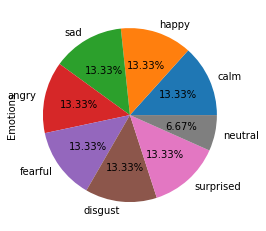

In [25]:
dataset["Emotions"].value_counts().plot.pie(autopct="%.2f%%");

# Feature extraction

- __chroma_stft(*[, y, sr, S, norm, n_fft, ...])__ Compute a chromagram from a waveform or power spectrogram.

- __melspectrogram(*[, y, sr, S, n_fft, ...])__ Compute a mel-scaled spectrogram.

- __mfcc(*[, y, sr, S, n_mfcc, dct_type, norm, ...])__ Mel-frequency cepstral coefficients (MFCCs)

- __spectral_contrast(*[, y, sr, S, n_fft, ...])__ Compute spectral contrast

- __tonnetz(*[, y, sr, chroma])__ Computes the tonal centroid features (tonnetz)

Il dtabase che viene a crearsi deve avere come righe gli attori e come colonne: emozione, intensità, statement, percorso, per ogni feature una colonna con i valori estratti per quel file audio dalla rispettiva feature

In [55]:
y, sr = librosa.load(audio_file)

In [56]:
chroma_stft = []
for audio_file in dataset["Path"]:
    chroma_stft.append(librosa.feature.chroma_stft(y=y, sr=sr))

sto rimpiazzando sempre lo stesso valore, controllare come fare append nell'array

In [57]:
chroma_stft

[array([[0.        , 0.        , 0.        , ..., 0.69669753, 0.88826084,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.7240015 , 0.8029728 ,
         0.94860804],
        [0.        , 0.        , 0.        , ..., 0.8668238 , 0.686978  ,
         0.6942433 ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.92370594, 1.        ,
         0.8270697 ],
        [0.        , 0.        , 0.        , ..., 0.7868683 , 0.812051  ,
         0.76229143],
        [0.        , 0.        , 0.        , ..., 0.8609518 , 0.83107287,
         0.78528947]], dtype=float32),
 array([[0.        , 0.        , 0.        , ..., 0.69669753, 0.88826084,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.7240015 , 0.8029728 ,
         0.94860804],
        [0.        , 0.        , 0.        , ..., 0.8668238 , 0.686978  ,
         0.6942433 ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.92370594, 1.        ,
         0.8270697 

In [66]:
dataset.insert(4, "Chroma_stft", chroma_stft, True)
dataset.head()

,Path,Emotions,Emotional_intensity,Statement,Chroma_stft
0,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,neutral,normal,Kids are talking by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,neutral,normal,Kids are talking by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,neutral,normal,Dogs are sitting by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,neutral,normal,Dogs are sitting by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,calm,normal,Kids are talking by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


Faccio la stessa cosa per le feature restanti

In [58]:
melspectrogram = []
for audio_file in dataset["Path"]:
    melspectrogram.append(librosa.feature.melspectrogram(y=y, sr=sr))

In [67]:
dataset.insert(5, "Melspectrogram", melspectrogram, True)

In [59]:
mfcc = []
for audio_file in dataset["Path"]:
    mfcc.append(librosa.feature.mfcc(y=y, sr=sr))

In [68]:
dataset.insert(6, "MFCC", mfcc, True)

In [62]:
spectral_contrast = []
for audio_file in dataset["Path"]:
    spectral_contrast.append(librosa.feature.spectral_contrast(y=y, sr=sr))

In [69]:
dataset.insert(7, "Contrast", spectral_contrast, True)

In [64]:
tonnetz = []
for audio_file in dataset["Path"]:
    tonnetz.append(librosa.feature.tonnetz(y=y, sr=sr))

In [70]:
dataset.insert(8, "Tonnetz", tonnetz, True)

In [71]:
dataset.tail()

,Path,Emotions,Emotional_intensity,Statement,Chroma_stft,Melspectrogram,MFCC,Contrast,Tonnetz
1435,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,normal,Dogs are sitting by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-718.59033, -718.59033, -718.59033, -718.590...","[[17.377089377931384, 17.377089377931384, 17.3...","[[-0.006474775897623823, -0.017485309304548693..."
1436,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,strong,Kids are talking by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-718.59033, -718.59033, -718.59033, -718.590...","[[17.377089377931384, 17.377089377931384, 17.3...","[[-0.006474775897623823, -0.017485309304548693..."
1437,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,strong,Kids are talking by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-718.59033, -718.59033, -718.59033, -718.590...","[[17.377089377931384, 17.377089377931384, 17.3...","[[-0.006474775897623823, -0.017485309304548693..."
1438,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,strong,Dogs are sitting by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-718.59033, -718.59033, -718.59033, -718.590...","[[17.377089377931384, 17.377089377931384, 17.3...","[[-0.006474775897623823, -0.017485309304548693..."
1439,C:\Users\aleza\Desktop\TesiAZ\Audio_Speech_Act...,surprised,strong,Dogs are sitting by the door,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-718.59033, -718.59033, -718.59033, -718.590...","[[17.377089377931384, 17.377089377931384, 17.3...","[[-0.006474775897623823, -0.017485309304548693..."


# Codice da corregere

## link utili
- https://librosa.org/doc/latest/index.html
- https://librosa.org/doc/latest/feature.html
- https://librosa.org/doc/latest/tutorial.html
- https://www.kaggle.com/code/robikscube/working-with-audio-in-python/notebook
- https://www.youtube.com/watch?v=eHJrZa2LtKw&t=221s
- https://stackoverflow.com/questions/68645918/how-to-export-data-frame-in-jupyter-as-a-csv-file Quando ho il df per salvarlo come csv 

## Loading an audio file:
librosa.load(path, *, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')

Load an audio file as a floating point time series. Audio will be automatically resampled to the given rate (default sr=22050). To preserve the native sampling rate of the file, use sr=None.

Returns:<br>
y: np.ndarray [shape=(n,) or (…, n)] audio time series. Multi-channel is supported.<br>
sr: number > 0 [scalar], sampling rate of y

    audio_data = '/kaggle/input/birdsong-recognition/train_audio/nutwoo/XC462016.mp3'
    y , sr = librosa.load(audio_data)
    print(type(y), type(sr))
    print(y.shape, sr)

This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.<br>
librosa.load(audio_data, sr=44100)

## Visualizing Audio:
    
We can plot the audio array using librosa.display.waveplot:

    %matplotlib inline
    import matplotlib.pyplot as plt
    import librosa.display
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)

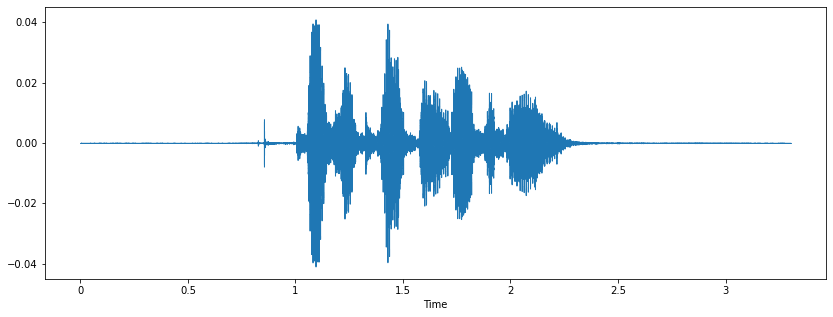

In [83]:
y , sr = librosa.load(data_path["Path"].loc[0])
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

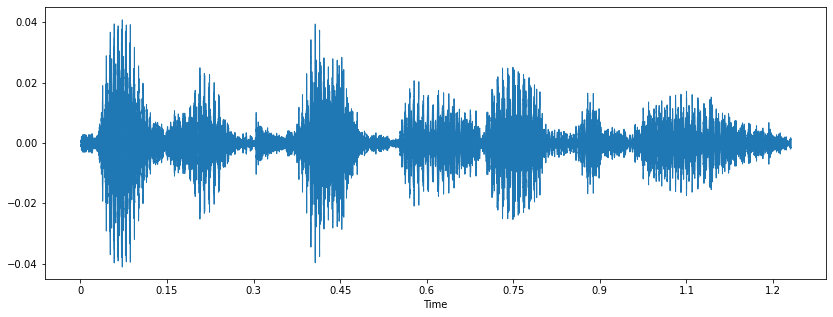

In [82]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_trimmed, sr=sr)

<AxesSubplot:>

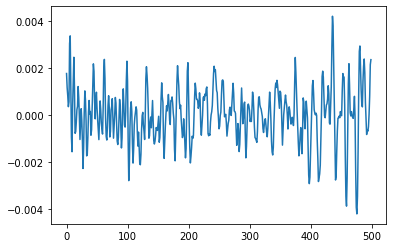

In [85]:
pd.Series(y[30000:30500]).plot()

## Spectrogram

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.<br>
A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.<br>
We can display a spectrogram using. librosa.display.specshow:

    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

.stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. .specshow is used to display a spectrogram.<br>
The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

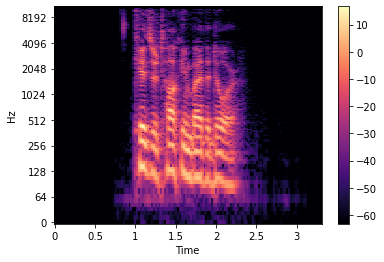

In [62]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [92]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 143)

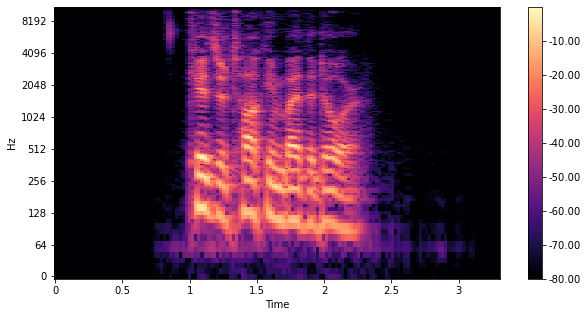

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time',y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format=f'%0.2f')

## Mel-spectrogram

In [86]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

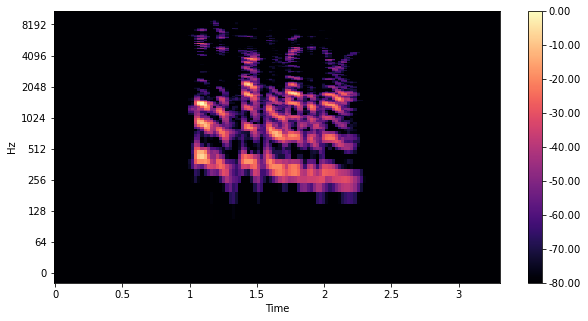

In [91]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format=f'%0.2f')

Mel-Frequency Cepstral Coefficients(MFCCs):

    fs=10
    mfccs = librosa.feature.mfcc(x, sr=fs)
    print(mfccs.shape)
    (20, 97)
    #Displaying  the MFCCs:
    plt.figure(figsize=(15, 7))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')

(20, 143)


C:\Users\aleza\AppData\Local\Temp/ipykernel_2140/372712928.py:2: FutureWarning: Pass y=[ 1.6517616e-08 -6.5464434e-08  1.2522355e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


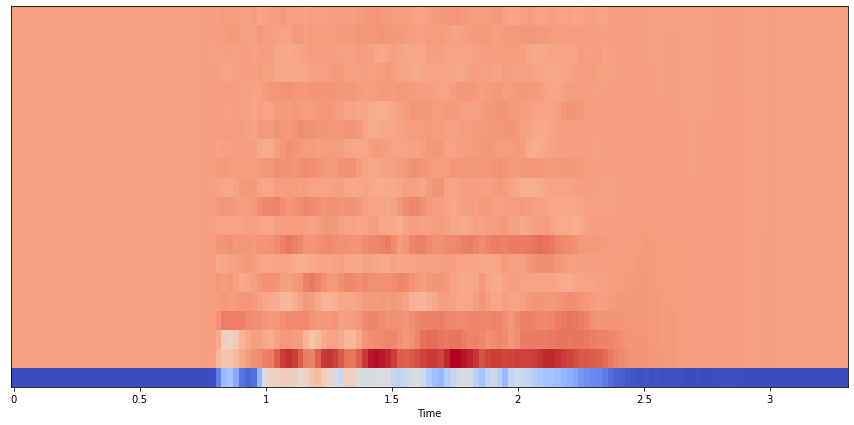

In [63]:
fs=10
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Chroma feature

    hop_length=12
    chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

C:\Users\aleza\AppData\Local\Temp/ipykernel_2140/1141143352.py:2: FutureWarning: Pass y=[ 1.6517616e-08 -6.5464434e-08  1.2522355e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


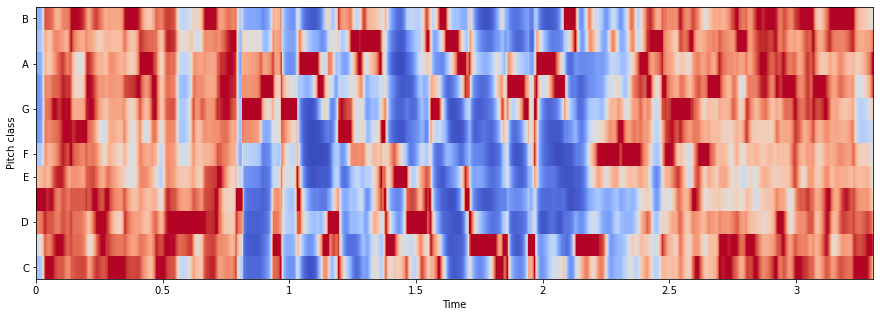

In [64]:
hop_length=12
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')